<a href="https://colab.research.google.com/github/patrickjwolf/DS-Unit-1-Build/blob/master/Unit_1_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from shapely.geometry import Point, Polygon
import osr
from zipfile import *
import io
from urllib.request import urlopen
import plotly.graph_objects as go
import urllib
from numpy import nan
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving approval_rating.csv to approval_rating.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving tweets.csv to tweets.csv


In [0]:
approval_rating = pd.read_csv('approval_rating.csv')

In [0]:
tweets = pd.read_csv('tweets.csv')

In [0]:
tweets_noNaN=pd.read_csv('tweets.csv')

In [0]:
print(approval_rating.shape)

approval_rating.head()

(120, 8)


,Date,Year_Month,Year,Month,Day,Approve %,Disapprove %,No opinion %
0,2019 Nov 14,2019 Nov,2019,Nov,14,43,54,3
1,2019 Oct 31,2019 Oct,2019,Oct,31,41,57,2
2,2019 Oct 13,2019 Oct,2019,Oct,13,39,57,5
3,2019 Sep 30,2019 Sep,2019,Sep,30,40,56,3
4,2019 Sep 15,2019 Sep,2019,Sep,15,43,54,4


In [0]:
print(tweets.shape)

tweets.head()

(1024, 12)


,Source,created_at,Date,Year_Month,Year,Month,Day,Time,id_str,Daily_Tweet_Count,Monthly_Tweet_Count,Annual_Tweet_Count
0,Twitter for Android,1/20/2017 12:31,2017 Jan 20,2017 Jan,2017,Jan,20,12:31 PM,8.224210e+17,11,69,2156
1,Twitter for iPhone,1/21/2017 4:56,2017 Jan 21,2017 Jan,2017,Jan,21,4:56 AM,8.226690e+17,2,,
2,Twitter for Android,1/22/2017 12:35,2017 Jan 22,2017 Jan,2017,Jan,22,12:35 PM,8.231470e+17,4,,
3,Twitter for Android,1/23/2017 11:38,2017 Jan 23,2017 Jan,2017,Jan,23,11:38 AM,8.234950e+17,1,,
4,Twitter for Android,1/24/2017 11:11,2017 Jan 24,2017 Jan,2017,Jan,24,11:11 AM,8.238510e+17,4,,


In [0]:
approval_rating.describe

<bound method NDFrame.describe of             Date Year_Month  Year  ... Approve %  Disapprove %  No opinion %
0    2019 Nov 14   2019 Nov  2019  ...        43            54             3
1    2019 Oct 31   2019 Oct  2019  ...        41            57             2
2    2019 Oct 13   2019 Oct  2019  ...        39            57             5
3    2019 Sep 30   2019 Sep  2019  ...        40            56             3
4    2019 Sep 15   2019 Sep  2019  ...        43            54             4
..           ...        ...   ...  ...       ...           ...           ...
115  2017 Feb 26   2017 Feb  2017  ...        42            53             5
116  2017 Feb 19   2017 Feb  2017  ...        40            54             5
117  2017 Feb 12   2017 Feb  2017  ...        41            53             6
118   2017 Jan 5   2017 Jan  2017  ...        43            52             5
119  2017 Jan 29   2017 Jan  2017  ...        45            47             8

[120 rows x 8 columns]>

In [0]:
tweets.describe

<bound method NDFrame.describe of                    Source  ... Annual_Tweet_Count
0     Twitter for Android  ...               2156
1      Twitter for iPhone  ...                   
2     Twitter for Android  ...                   
3     Twitter for Android  ...                   
4     Twitter for Android  ...                   
...                   ...  ...                ...
1019   Twitter for iPhone  ...                   
1020   Twitter for iPhone  ...                   
1021   Twitter for iPhone  ...                   
1022   Twitter for iPhone  ...                   
1023   Twitter for iPhone  ...                   

[1024 rows x 12 columns]>

In [0]:
approval_rating.dtypes

Date            object
Year_Month      object
Year             int64
Month           object
Day              int64
Approve %        int64
Disapprove %     int64
No opinion %     int64
dtype: object

In [0]:
tweets = tweets.replace(' ', np.NaN)

In [0]:
tweets.Daily_Tweet_Count= tweets.Daily_Tweet_Count.astype(float)
tweets.Monthly_Tweet_Count= tweets.Monthly_Tweet_Count.astype(float)
tweets.Annual_Tweet_Count= tweets.Annual_Tweet_Count.astype(float)


In [0]:
tweets_noNaN.Daily_Tweet_Count= tweets_noNaN.Daily_Tweet_Count.astype(float)

In [0]:
tweets.dtypes

Source                  object
created_at              object
Date                    object
Year_Month              object
Year                     int64
Month                   object
Day                      int64
Time                    object
id_str                 float64
Daily_Tweet_Count      float64
Monthly_Tweet_Count    float64
Annual_Tweet_Count     float64
dtype: object

In [0]:
tweets.isnull().sum()

Source                    0
created_at                0
Date                      0
Year_Month                0
Year                      0
Month                     0
Day                       0
Time                      0
id_str                    0
Daily_Tweet_Count         0
Monthly_Tweet_Count     989
Annual_Tweet_Count     1021
dtype: int64

In [0]:
approval_rating.isnull().sum()

Date            0
Year_Month      0
Year            0
Month           0
Day             0
Approve %       0
Disapprove %    0
No opinion %    0
dtype: int64

In [0]:
approval_tweets = (approval_rating[['Date','Year_Month', 'Year', 'Month','Day','Approve %','Disapprove %','No opinion %']]
                   .merge(tweets[['Date','Year_Month', 'Year', 'Month','Day', 'Time', 'Daily_Tweet_Count', 'Monthly_Tweet_Count', 'Annual_Tweet_Count']]))

In [0]:
approval_tweets_noNaN = (approval_rating[['Date','Year_Month', 'Year', 'Month','Day','Approve %','Disapprove %','No opinion %']]
                   .merge(tweets_noNaN[['Date','Year_Month', 'Year', 'Month','Day', 'Time', 'Daily_Tweet_Count', 'Monthly_Tweet_Count', 'Annual_Tweet_Count']]))

In [0]:
print(approval_tweets.shape)

approval_tweets.head()

(86, 12)


,Date,Year_Month,Year,Month,Day,Approve %,Disapprove %,No opinion %,Time,Daily_Tweet_Count,Monthly_Tweet_Count,Annual_Tweet_Count
0,2019 Nov 14,2019 Nov,2019,Nov,14,43,54,3,3:32 AM,13.0,NaN,NaN
1,2019 Oct 31,2019 Oct,2019,Oct,31,41,57,2,1:26 AM,17.0,NaN,NaN
2,2019 Oct 13,2019 Oct,2019,Oct,13,39,57,5,3:13 AM,20.0,NaN,NaN
3,2019 Sep 30,2019 Sep,2019,Sep,30,40,56,3,12:22 AM,33.0,NaN,NaN
4,2019 Sep 15,2019 Sep,2019,Sep,15,43,54,4,12:17 PM,16.0,NaN,NaN


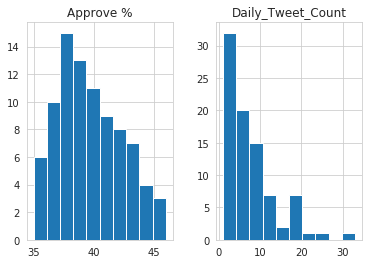

In [0]:
hist = approval_tweets.hist(column = ['Approve %', 'Daily_Tweet_Count'])

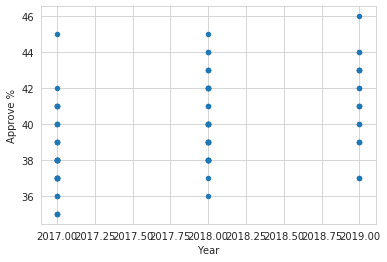

In [0]:

approval_tweets.plot.scatter('Year', 'Approve %');

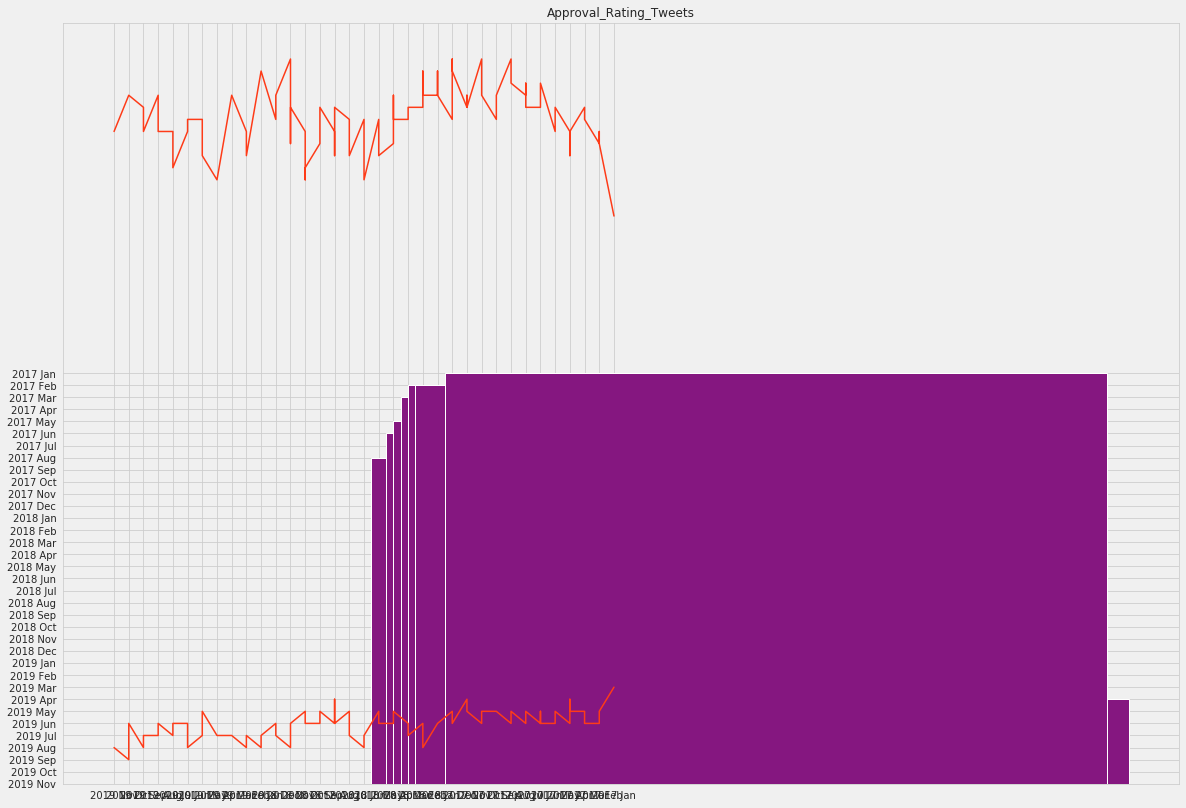

In [0]:
fig, ax = plt.subplots(figsize=(20,14))
fig.patch.set(facecolor='#f0f0f0')
ax.set(facecolor="#f0f0f0")


plt.bar(approval_tweets['Approve %'],approval_tweets['Year_Month'], approval_tweets['Approve %'], color='#851780')
plt.plot(approval_tweets['Year_Month'], approval_tweets['Monthly_Tweet_Count'], color='#851780')
plt.plot(approval_tweets['Year_Month'], approval_tweets['Disapprove %'], color='#fe3b18')
plt.plot(approval_tweets['Year_Month'], approval_tweets['No opinion %'], color='#fe3b18')

plt.title('Approval_Rating_Tweets')
plt.show()

([<matplotlib.axis.XTick at 0x7fed2fc267f0>,
 <a list of 5 Text xticklabel objects>)

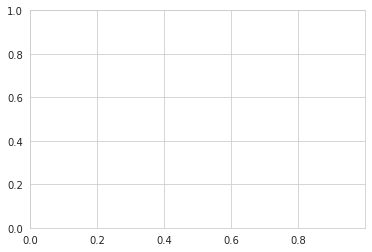

In [0]:

matplotlib.pyplot.xticks(np.arange(0, 1, step=0.2))

In [0]:

fig, ax = plt.subplots(figsize=(10,8))
fig.patch.set(facecolor='#f0f0f0')
ax.set(facecolor="#f0f0f0")

approval_tweets.Year_Month = approval_tweets.Year_Month.T

plt.bar(approval_tweets['Year_Month'], approval_tweets['Approve %'], color='y')
plt.plot(approval_tweets['Year_Month], approval_tweets['Daily_Tweet_Count'], color='red')


plt.title('Approval Rating to Tweet Correlation')
plt.show()

SyntaxError: ignored

xticks = ['Jan 2017','Apr 2017','Jul 2017','Dec 2017','Jan 2018','Apr 2018','Jul 2018','Dec 2018','Jan 2019','Apr 2019','Jul 2019','Nov 2019']
plt.xticks(x, xticks, rotation=90)
locator = MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax.xaxis.set_major_locator(locator)

NameError: ignored

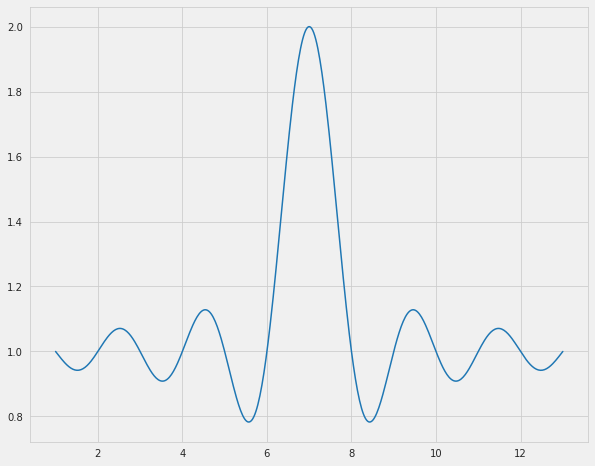

In [0]:
fig, ax = plt.subplots(figsize=(10,8))
fig.patch.set(facecolor='#f0f0f0')
ax.set(facecolor="#f0f0f0")

xticks = ['Jan 2017','Apr 2017','Jul 2017','Dec 2017','Jan 2018','Apr 2018','Jul 2018','Dec 2018','Jan 2019','Apr 2019','Jul 2019','Nov 2019']
plt.plot(x, y)
plt.plot(x, y2)
plt.xticks(x, xticks, rotation=90)
plt.show()

plt.plot(tweets['Year_Month'], tweets['Monthly_Tweet_Count'], color='#851780')
plt.plot(approval_rating['Year_Month'], approval_rating['Approve %'], color='#851780')
plt.plot(approval_rating['Year_Month'], approval_rating['Disapprove %'], color='#fe3b18')
plt.plot(approval_rating['Year_Month'], approval_rating['No opinion %'], color='#fe3b18')

plt.title('Approval_Rating_Tweets')
plt.show()

AttributeError: ignored

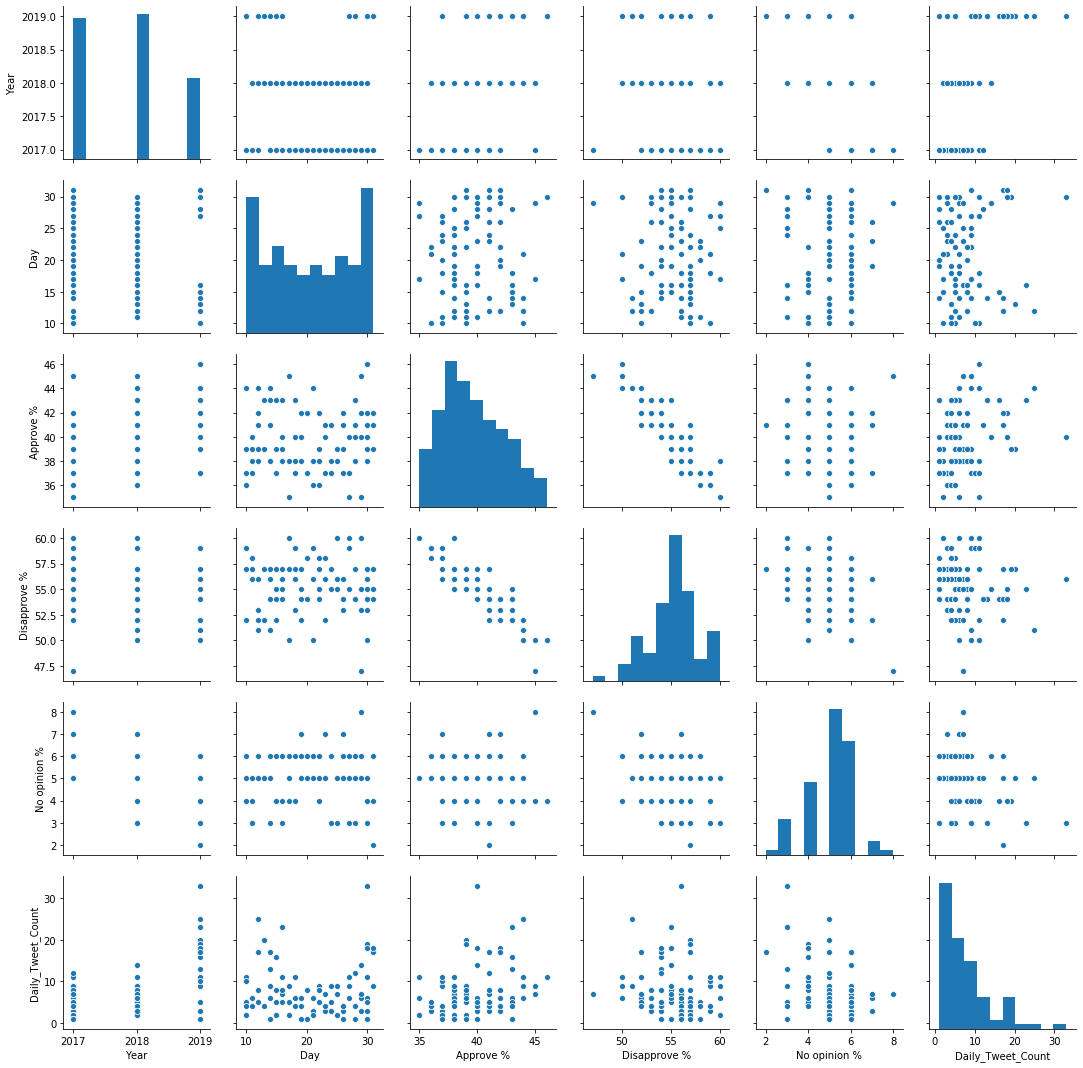

In [0]:
# Basic correlogram
sns.pairplot(approval_tweets_noNaN)
sns.plt.show()

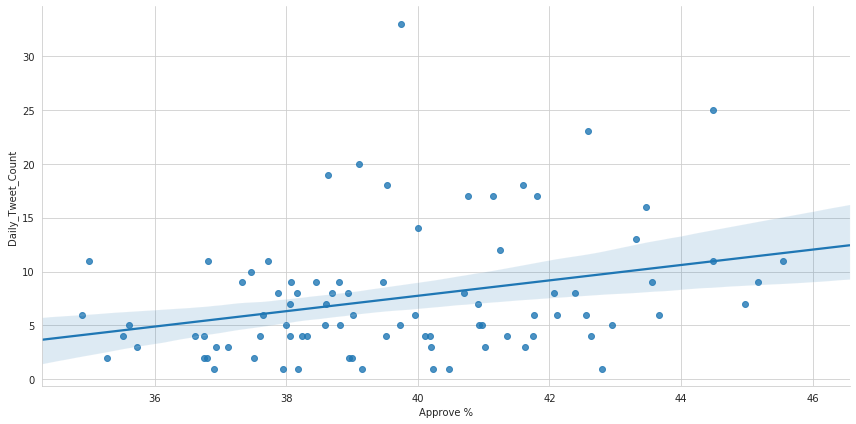

In [0]:
sns.set_style('whitegrid') 
sns.lmplot(x ='Approve %', y ='Daily_Tweet_Count', data = approval_tweets_noNaN, height=6, aspect=2, x_jitter=.5)

[[43. 13.]
 [41. 17.]
 [39. 20.]
 [40. 33.]
 [43. 16.]
 [39. 19.]
 [41. 17.]
 [42. 18.]
 [44. 25.]
 [41.  3.]
 [43. 23.]
 [40. 18.]
 [42. 17.]
 [46. 11.]
 [39.  5.]
 [43.  1.]
 [44. 11.]
 [37.  9.]
 [37. 10.]
 [39.  9.]
 [38. 11.]
 [38.  9.]
 [43.  6.]
 [38.  4.]
 [40.  4.]
 [44.  6.]
 [44.  9.]
 [42.  6.]
 [40.  3.]
 [38.  7.]
 [41.  4.]
 [42.  6.]
 [39.  5.]
 [40. 14.]
 [42.  8.]
 [43.  5.]
 [41.  5.]
 [45.  9.]
 [40.  6.]
 [42.  8.]
 [43.  4.]
 [42.  3.]
 [38.  8.]
 [39.  8.]
 [39.  7.]
 [40.  4.]
 [39.  6.]
 [39.  2.]
 [37. 11.]
 [40.  4.]
 [38.  4.]
 [36.  3.]
 [38.  6.]
 [39.  9.]
 [37.  3.]
 [35.  2.]
 [36.  4.]
 [37.  3.]
 [38.  4.]
 [38.  8.]
 [35.  6.]
 [36.  5.]
 [37.  2.]
 [38.  9.]
 [38.  5.]
 [37.  2.]
 [35. 11.]
 [37.  1.]
 [38.  1.]
 [37.  4.]
 [39.  8.]
 [39.  2.]
 [38.  4.]
 [37.  4.]
 [41. 12.]
 [38.  2.]
 [38.  1.]
 [41.  5.]
 [41.  7.]
 [40.  5.]
 [39.  1.]
 [40.  1.]
 [42.  4.]
 [40.  1.]
 [41.  8.]
 [45.  7.]]
Power_divergenceResult(statistic=2033.2590317031209, 

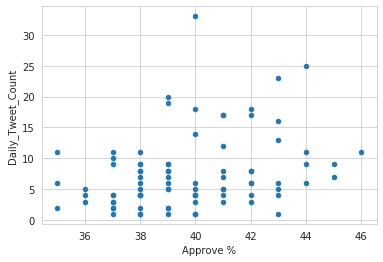

In [0]:
from scipy.stats import chisquare
approval_tweets_noNaN.plot.scatter('Approve %', 'Daily_Tweet_Count');
atn = np.array([approval_tweets_noNaN['Approve %'], approval_tweets_noNaN['Daily_Tweet_Count']]).T
print(atn)
print(chisquare(atn, axis=None))

[[43. 13.]
 [41. 17.]
 [39. 20.]
 [40. 33.]
 [43. 16.]
 [39. 19.]
 [41. 17.]
 [42. 18.]
 [44. 25.]
 [41.  3.]
 [43. 23.]
 [40. 18.]
 [42. 17.]
 [46. 11.]
 [39.  5.]
 [43.  1.]
 [44. 11.]
 [37.  9.]
 [37. 10.]
 [39.  9.]
 [38. 11.]
 [38.  9.]
 [43.  6.]
 [38.  4.]
 [40.  4.]
 [44.  6.]
 [44.  9.]
 [42.  6.]
 [40.  3.]
 [38.  7.]
 [41.  4.]
 [42.  6.]
 [39.  5.]
 [40. 14.]
 [42.  8.]
 [43.  5.]
 [41.  5.]
 [45.  9.]
 [40.  6.]
 [42.  8.]
 [43.  4.]
 [42.  3.]
 [38.  8.]
 [39.  8.]
 [39.  7.]
 [40.  4.]
 [39.  6.]
 [39.  2.]
 [37. 11.]
 [40.  4.]
 [38.  4.]
 [36.  3.]
 [38.  6.]
 [39.  9.]
 [37.  3.]
 [35.  2.]
 [36.  4.]
 [37.  3.]
 [38.  4.]
 [38.  8.]
 [35.  6.]
 [36.  5.]
 [37.  2.]
 [38.  9.]
 [38.  5.]
 [37.  2.]
 [35. 11.]
 [37.  1.]
 [38.  1.]
 [37.  4.]
 [39.  8.]
 [39.  2.]
 [38.  4.]
 [37.  4.]
 [41. 12.]
 [38.  2.]
 [38.  1.]
 [41.  5.]
 [41.  7.]
 [40.  5.]
 [39.  1.]
 [40.  1.]
 [42.  4.]
 [40.  1.]
 [41.  8.]
 [45.  7.]]
Power_divergenceResult(statistic=2033.2590317031209, 

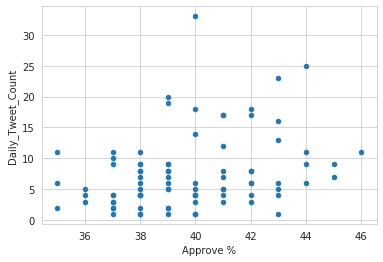

In [0]:
approval_tweets.plot.scatter('Approve %', 'Daily_Tweet_Count');
atn = np.array([approval_tweets['Approve %'], approval_tweets['Daily_Tweet_Count']]).T
print(atn)
print(chisquare(atn, axis=None))